# Part 0: Startup

In [3]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import pytz
from tqdm import tqdm
from decimal import Decimal
import plotly_uzh_template


In [4]:
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe

format_k = lambda x, pos: f'{x/10**3:,.0f}K'
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')
import warnings
# 忽略 pandas 警告
warnings.filterwarnings('ignore')
from matplotlib import font_manager

font_dirs = ['/home/user/yan/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)



In [2]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [5]:
#pip install statsmodels

# Part I Total Reward Sum by Daily

In [5]:
# Read in Transaction Data
# data = pd.read_csv('total_reward_sum_by_daily.csv')
import pandas as pd
def read_large_csv(file_path, chunk_size=1000000):
    accumulated_data = pd.DataFrame()
    chunks = pd.read_csv(file_path, chunksize=chunk_size)
    for chunk in chunks:
        accumulated_data = pd.concat([accumulated_data, chunk])
    return accumulated_data
data=read_large_csv('/local/scratch/exported/Ethereum_token_txs_data/rewards/total_reward_sum_daily.csv')
data.head()

date  final_total_reward  proposer_total_reward  \
0  2022-09-15       1142336453893           147823762714   
1  2022-09-16       1590103889535           205197949000   
2  2022-09-17       1609976379528           206454113667   
3  2022-09-18       1620454747426           207083260113   
4  2022-09-19       1626254416652           207451069783   

   attestation_total_reward  sync_total_reward  
0              960736468121        33776223058  
1             1336935154055        47970786480  
2             1354427393059        49094872802  
3             1363916989995        49454497318  
4             1369820615547        48982731322

In [4]:
data=data.sort_values(by='date') # sort by date

In [5]:
#Convert Gwei to Ether
data=data.set_index('date')
data=data/Decimal(10**9)
data=data.reset_index()

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = data.copy()
df=df.iloc[1:-1] # cut the first day and last day

# Create subplots in a 2x2 layout
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("Time Series", "Distribution", "Boxplot", "Statistics"),
                    specs=[[{}, {}], [{}, {"type": "domain"}]])

# Add time series to the top-left subplot
fig.add_trace(go.Scatter(x=df['date'], y=df['final_total_reward'], mode='lines', name='Time Series'),
              row=1, col=1)

# Add histogram to the top-right subplot
fig.add_trace(go.Histogram(x=df['final_total_reward'], name='Distribution'),
              row=1, col=2)

# Add boxplot to the bottom-left subplot
fig.add_trace(go.Box(y=df['final_total_reward'], name='Boxplot', boxmean=True),
              row=2, col=1)

# Extract specific statistics from the data: mean, median (50%), and std
selected_stats = {
    'mean': df['final_total_reward'].mean(),
    'median': df['final_total_reward'].median(),
    'std': df['final_total_reward'].apply(float).std()
}

trace_table = go.Table(
    header=dict(values=['Statistic', 'Value'], font=dict(size=10), align='left'),
    cells=dict(values=[list(selected_stats.keys()), list(selected_stats.values())], font=dict(size=10), align='left')
)

fig.add_trace(trace_table, row=2, col=2)

# Update layout to use LaTeX style font (using "Courier New" as a fallback)
fig.update_layout(
    # font=dict(family="Courier New, monospace", size=18, color="black"),
    title_text="Subplots for Daily Total Reward (Ether)"
)

# Show figure
fig.show()


In [22]:
# Save the figure with high resolution
fig.write_image("./new_figures/total_reward_daily.pdf",height=500, width=800, scale=3)  # The scale parameter can be adjusted for desired resolution.

In [16]:

import pandas as pd
import plotly.graph_objects as go

df=data.copy()
df=df.iloc[1:-1] # cut the first day and last day
df.rename(columns={'final_total_reward':'Total reward','proposer_total_reward':'Proposer reward','attestation_total_reward':'Attestation reward','sync_total_reward':'Sync committee reward'
                   },inplace=True)# Get columns that end with '_reward'
reward_columns = [col for col in df.columns if col.endswith('reward') and col != 'Total reward']
colors = ['#fede00', '#dc6027','#91c34a']
names=['Sync committee reward', 'Attestation reward', 'Proposer reward']
# Create a Plotly figure
fig = go.Figure()

# Add traces for each reward column
for col in reward_columns:
    # fig.add_trace(go.Scatter(x=df['date'], y=df[col], mode='none', stackgroup='one', name=names.pop(),marker_color=colors.pop(),line=dict(color=colors.pop()), fill='tonexty'))

    fig.add_trace(go.Scatter(x=df['date'], y=df[col], stackgroup='one',name=names.pop(),marker_color=colors.pop()))
# fig.add_trace(go.Scatter(x=df['date'], y=df[reward_columns[0]],line=dict(color='#3353b7')))
# fig.add_trace(go.Scatter(x=df['date'], y=df[reward_columns[1]],line=dict(color='#91c34a')))
# fig.add_trace(go.Scatter(x=df['date'], y=df[reward_columns[2]],line=dict(color='#dc6027')))


# Update layout for the legend and other properties
fig.update_layout(
    width=800,  # 设置宽度
    height=500, 
    # font=dict(family="Courier New, monospace", size=16, color="black"),
    # title_text=f"Decomposition of total daily reward (Ether)",
    showlegend=True,
    legend=dict(
        y=1.2,            # Adjusts the y position
        x=0.5,    # Adjusts the x position
        font=dict(
            size=18,
            color="black"
        ),
        xanchor='center', # Anchor the x position
        yanchor='top',    # Anchor the y position
        orientation='h'   # Horizontal orientation
    ),
    xaxis_title="Date", yaxis_title="Reward (Ether)",
)
# Show figure
fig.show()


In [10]:
# import plotly.express as px
# px.line(data.iloc[1:-1], x='date', y='final_total_reward', title='Daily Total Reward (Ether)')

In [17]:
# Save the figure with high resolution,keep the font
fig.write_image("./new_figures/reward3_timeseries_daily.pdf", height=500, width=1200, scale=3)  # The scale parameter can be adjusted for desired resolution.

In [35]:
#画一个堆叠柱状图
import pandas as pd
import plotly.graph_objects as go
df=data.copy()
df=df.iloc[1:-1] # cut the first day and last day
# Get columns that end with '_reward'
reward_columns = [col for col in df.columns if col.endswith('_reward') and col != 'final_total_reward']
colors = ['#0028a5', '#dc6027', '#fede00']
names=['Sync committee reward', 'Attestation reward', 'Proposer reward']
# Create a Plotly figure
fig = go.Figure()
# Add traces for each reward column
for col in reward_columns:
    fig.add_trace(go.Bar(x=df['date'], y=df[col],marker_color=colors.pop()))
fig.update_layout(barmode='stack')


In [12]:
import pandas as pd
import plotly.graph_objects as go

# Sample data (replace with your data)
df =data.copy()

# Get columns that end with '_reward' but exclude 'final_total_reward'
reward_columns = [col for col in df.columns if col.endswith('_reward') and col != 'final_total_reward']

# Compute total reward for each date excluding 'final_total_reward'
df['total_reward_excluding_final'] = df[reward_columns].sum(axis=1)

# Convert each reward column to a percentage of the total reward excluding 'final_total_reward'
for col in reward_columns:
    df[col] = (df[col] / df['total_reward_excluding_final']) * 100

# Create a Plotly figure
fig = go.Figure()

# Add traces for each reward column in percentage
for col in reward_columns:
    fig.add_trace(go.Scatter(x=df['date'], y=df[col], mode='none', stackgroup='one', groupnorm='percent', name=col))
fig.update_yaxes(title='percentage')
# Update layout for the legend and other properties
fig.update_layout(
    font=dict(family="Courier New, monospace", size=16, color="black"),
    title_text=f"Decomposition of total daily reward (Gwei) in percentage",
    showlegend=True,
    legend=dict(
        y=1.05,            # Adjusts the y position
        x=0.5,            # Adjusts the x position
        xanchor='center', # Anchor the x position
        yanchor='top',    # Anchor the y position
        orientation='h'   # Horizontal orientation
    )
)

# Show figure
fig.show()


In [13]:
# Save the figure with high resolution
fig.write_image("reward3_timeseries_Percentage_daily.png",height=900, width=1600, scale=3)  # The scale parameter can be adjusted for desired resolution.

In [18]:
import pandas as pd
import plotly.graph_objects as go
from scipy import stats

# Sample data (replace with your data)
df = data.copy()
df=df.iloc[1:-1]
df.rename(columns={'final_total_reward':'Total reward','proposer_total_reward':'Proposer reward','attestation_total_reward':'Attestation reward','sync_total_reward':'Sync committee reward'
                   },inplace=True)
# Filter columns ending with '_reward'
# reward_columns = [col for col in df.columns if col.endswith('_reward')]
reward_columns=['Total reward','Sync committee reward','Attestation reward','Proposer reward']
# Initialize matrices to hold correlation coefficients and p-values
correlation_matrix = df[reward_columns].corr()
p_values = pd.DataFrame(index=reward_columns, columns=reward_columns)

# Compute p-values
for col1 in reward_columns:
    for col2 in reward_columns:
        _, p = stats.pearsonr(df[col1].apply(float), df[col2].apply(float))
        p_values.at[col1, col2] = p

# Generate annotations for heatmap
annotations = []
for i, col1 in enumerate(reward_columns):
    for j, col2 in enumerate(reward_columns):
        value = correlation_matrix.at[col1, col2]
        p_value = p_values.at[col1, col2]
        annotations.append({
            'x': col2, 'y': col1, 'xref': 'x1', 'yref': 'y1',
            'text': f"{value:.2f} (p={p_value:.2f})",
            'font': dict(size=9, color='black' if p_value < 0.05 else 'gray'),
            'showarrow': False
        })

# Create the heatmap
fig = go.Figure(go.Heatmap(
    z=correlation_matrix,
    x=reward_columns,
    y=reward_columns,
    colorscale='Blues_r',  # Reversed blue colorscale
    zmin=0,
    zmax=1,
))

# Update the layout for LaTeX-style font and smaller font size and add annotations
fig.update_layout(
    # font=dict(family="Courier New, monospace", size=10, color="black"),
    # title_text="Correlation Matrix of Reward Columns",
    annotations=annotations
)

# Show figure
fig.show()


In [34]:
# Save the figure with high resolution
fig.write_image("./new_figures/reward4_correlation_daily.pdf", scale=3)  # The scale parameter can be adjusted for desired resolution.

In [38]:
from plotly.subplots import make_subplots
# List of the four specified columns
# columns_to_plot = ['final_total_reward', 'proposer_total_reward', 'attestation_total_reward', 'sync_total_reward']
df = data.copy()
df=df.iloc[1:-1]
df=df.set_index('date')
df.rename(columns={'final_total_reward':'Total reward','proposer_total_reward':'Proposer reward','attestation_total_reward':'Attestation reward','sync_total_reward':'Sync committee reward'
                   },inplace=True)
# Define subplots
rows = len(df.columns)
fig = make_subplots(rows=rows, cols=1)

# Add histograms to each subplot row
for row, column in enumerate(df.columns, start=1):
    fig.add_trace(go.Histogram(x=df[column], name=column, nbinsx=15,opacity=0.8), row=row, col=1)

#给最下面的图加上x轴标签
fig.update_xaxes(title_text="Reward (Ether)", row=rows, col=1)
#给最下面的图加上y轴标签
fig.update_yaxes(title_text="Frequency", row=rows, col=1)

# Update layout to use LaTeX style font and move the legend above the figure
fig.update_layout(
     height=150 * len(df.columns), 
    # font=dict(family="Courier New, monospace", size=16, color="black"),
    # title_text="Distribution of Daily Rewards (Ether)",
    legend=dict(orientation="h", yanchor="bottom",x=0.95,y=1.05, font=dict(size=20),xanchor="right")
)
fig.show()

In [39]:
fig.write_image("./new_figures/reward2_distribution_daily.pdf",height=900, width=1400, scale=3)  # The scale parameter can be adjusted for desired resolution.

# Part II Total Reward Sum by Epoch

In [68]:
# Read in Transaction Data
# data = pd.read_csv('total_reward_sum_by_epoch.csv')
import pandas as pd
def read_large_csv(file_path, chunk_size=1000000):
    accumulated_data = pd.DataFrame()
    chunks = pd.read_csv(file_path, chunksize=chunk_size)
    for chunk in chunks:
        accumulated_data = pd.concat([accumulated_data, chunk])
    return accumulated_data
data = read_large_csv('/local/scratch/exported/Ethereum_token_txs_data/rewards/total_reward_sum_by_epoch.csv')
data.head()

epoch  final_total_reward  proposer_total_reward  \
0  148875          7416773592              935312096   
1  148876          7388754435              933339979   
2  148877          7269028896              925151176   
3  148878          7401799074              934550885   
4  148879          7331724225              929659508   

   attestation_total_reward  sync_total_reward  
0                6253070340          228391156  
1                6227224298          228190158  
2                6131049552          212828168  
3                6239862023          227386166  
4                6184856893          217207824

In [69]:
data.sort_values(by='epoch',inplace=True) # Why there are multiple values for a date?
data=data.set_index('epoch')
data=data/Decimal(10**9)
data=data.reset_index()

In [70]:
data.dtypes

epoch                        int64
final_total_reward          object
proposer_total_reward       object
attestation_total_reward    object
sync_total_reward           object
dtype: object

In [71]:
data.columns

Index(['epoch', 'final_total_reward', 'proposer_total_reward',
       'attestation_total_reward', 'sync_total_reward'],
      dtype='object')

In [65]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = data.copy()

# Create subplots in a 2x2 layout
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("Time Series", "Distribution", "Boxplot", "Statistics"),
                    specs=[[{}, {}], [{}, {"type": "domain"}]])
# Add time series to the top-left subplot
fig.add_trace(go.Scatter(x=df['epoch'], y=df['final_total_reward'], mode='lines', name='Time Series'),
              row=1, col=1)

# Add histogram to the top-right subplot
fig.add_trace(go.Histogram(x=df['final_total_reward'], name='Distribution'),
              row=1, col=2)

# Add boxplot to the bottom-left subplot
fig.add_trace(go.Box(y=df['final_total_reward'], name='Boxplot', boxmean=True),
              row=2, col=1)

# Extract specific statistics from the data: mean, median (50%), and std
selected_stats = {
    'mean': df['final_total_reward'].mean(),
    'median': df['final_total_reward'].median(),
    'std': df['final_total_reward'].apply(float).std()
}

trace_table = go.Table(
    header=dict(values=['Statistic', 'Value'], font=dict(size=10), align='left'),
    cells=dict(values=[list(selected_stats.keys()), list(selected_stats.values())], font=dict(size=10), align='left')
)

fig.add_trace(trace_table, row=2, col=2)

# Update layout to use LaTeX style font (using "Courier New" as a fallback)
fig.update_layout(
    # font=dict(family="Courier New, monospace", size=18, color="black"),
    title_text="Subplots for Final Total Reward by Epoch(Ether)"
)

# Show figure
fig.show()


In [23]:
import plotly.io as pio
# Save the figure with high resolution
fig.write_image("total_reward_epoch.png", width=1600, height=900,scale=3)  # The scale parameter can be adjusted for desired resolution.


In [72]:
data.columns

Index(['epoch', 'final_total_reward', 'proposer_total_reward',
       'attestation_total_reward', 'sync_total_reward'],
      dtype='object')

In [75]:
import pandas as pd
import plotly.graph_objects as go

df=data.copy()
df.rename(columns={'final_total_reward':'Total reward','proposer_total_reward':'Proposer reward','attestation_total_reward':'Attestation reward','sync_total_reward':'Sync committee reward'
                   },inplace=True)
# Get columns that end with '_reward'
# reward_columns = [col for col in df.columns if col.endswith('_reward') and col != 'final_total_reward']
reward_columns = [col for col in df.columns if col != 'Total reward' and col != 'epoch']

# Create a Plotly figure
fig = go.Figure()

# Add traces for each reward column
for col in reward_columns:
    fig.add_trace(go.Scatter(x=df['epoch'], y=df[col], mode='none', stackgroup='one', name=col))

# Update layout for the legend and other properties
fig.update_layout(
    # font=dict(family="Courier New, monospace", size=18, color="black"),
    # title_text=f"Decomposition total reward by epoch",
    showlegend=True,
    legend=dict(
        y=1.05,            # Adjusts the y position
        x=0.5,            # Adjusts the x position
        xanchor='center', # Anchor the x position
        yanchor='top',    # Anchor the y position
        orientation='h'   # Horizontal orientation
    )
)


# Show figure
fig.show()


In [25]:
import plotly.io as pio
# Save the figure with high resolution
fig.write_image("reward3_timeseries_epoch.png", height=900, width=1600, scale=3)  # The scale parameter can be adjusted for desired resolution.


In [26]:
import pandas as pd
import plotly.graph_objects as go

# Sample data (replace with your data)
df =data.copy()

# Get columns that end with '_reward' but exclude 'final_total_reward'
reward_columns = [col for col in df.columns if col.endswith('_reward') and col != 'final_total_reward']

# Compute total reward for each date excluding 'final_total_reward'
df['total_reward_excluding_final'] = df[reward_columns].sum(axis=1)

# Convert each reward column to a percentage of the total reward excluding 'final_total_reward'
for col in reward_columns:
    df[col] = (df[col] / df['total_reward_excluding_final']) * 100

# Create a Plotly figure
fig = go.Figure()

# Add traces for each reward column in percentage
for col in reward_columns:
    fig.add_trace(go.Scatter(x=df['epoch'], y=df[col], mode='none', stackgroup='one', groupnorm='percent', name=col))
# Label y-axis as percentage for each subplot
fig.update_yaxes(title='Percentage')
    
# Update layout for the legend and other properties
fig.update_layout(
    font=dict(family="Courier New, monospace", size=18, color="black"),
    title_text=f"Decomposition of total reward by epoch",
    showlegend=True,
    legend=dict(
        y=1.05,            # Adjusts the y position
        x=0.5,            # Adjusts the x position
        xanchor='center', # Anchor the x position
        yanchor='top',    # Anchor the y position
        orientation='h',   # Horizontal orientation
    )
)

# Show figure
fig.show()


In [27]:
import plotly.io as pio
# Save the figure with high resolution
fig.write_image("reward3_timeseries_Percentage_epoch.png",height=900, width=1600, scale=3)  # The scale parameter can be adjusted for desired resolution.


In [77]:
import pandas as pd
import plotly.graph_objects as go
from scipy import stats

# Sample data (replace with your data)
df = data.copy()

# Filter columns ending with '_reward'
reward_columns = [col for col in df.columns if col.endswith('reward')]

# Initialize matrices to hold correlation coefficients and p-values
correlation_matrix = df[reward_columns].corr()
p_values = pd.DataFrame(index=reward_columns, columns=reward_columns)

# Compute p-values
for col1 in reward_columns:
    for col2 in reward_columns:
        _, p = stats.pearsonr(df[col1].apply(float), df[col2].apply(float))
        p_values.at[col1, col2] = p

# Generate annotations for heatmap
annotations = []
for i, col1 in enumerate(reward_columns):
    for j, col2 in enumerate(reward_columns):
        value = correlation_matrix.at[col1, col2]
        p_value = p_values.at[col1, col2]
        annotations.append({
            'x': col2, 'y': col1, 'xref': 'x1', 'yref': 'y1',
            'text': f"{value:.2f} (p={p_value:.2f})",
            'font': dict(size=9, color='black' if p_value < 0.05 else 'gray'),
            'showarrow': False
        })

# Create the heatmap
fig = go.Figure(go.Heatmap(
    z=correlation_matrix,
    x=reward_columns,
    y=reward_columns,
    colorscale='Blues_r',  # Reversed blue colorscale
    zmin=0,
    zmax=1,
))

# Update the layout for LaTeX-style font and smaller font size and add annotations
fig.update_layout(
    # font=dict(family="Courier New, monospace", size=10, color="black"),
    # title_text="Correlation Matrix of Reward Columns (Epoch)",
    annotations=annotations
)

# Show figure
fig.show()


In [29]:
import plotly.io as pio
# Save the figure with high resolution
fig.write_image("reward4_correlation_epoch.png", scale=3)  # The scale parameter can be adjusted for desired resolution.


In [78]:
from plotly.subplots import make_subplots
# List of the four specified columns
# columns_to_plot = ['final_total_reward', 'proposer_total_reward', 'attestation_total_reward', 'sync_total_reward']

columns_to_plot = [col for col in df.columns if col != 'epoch']
# Define subplots
rows = len(columns_to_plot)
fig = make_subplots(rows=rows, cols=1)

# Add histograms to each subplot row
for row, column in enumerate(columns_to_plot, start=1):
    fig.add_trace(go.Histogram(x=df[column], name=column, opacity=0.6), row=row, col=1)


# Update layout to use LaTeX style font and move the legend above the figure
fig.update_layout(
    # font=dict(family="Courier New, monospace", size=16, color="black"),
    # title_text="Distribution of Rewards by Epoch(Ether)",
    legend=dict(orientation="h", yanchor="bottom", y=1.05, xanchor="right", x=1)
)
fig.show()

In [31]:
import plotly.io as pio
# Save the figure with high resolution
fig.write_image("reward4_histogram_epoch.png", height=900, width=1600, scale=3)  # The scale parameter can be adjusted for desired resolution.


# Part III Index

In [40]:
import pandas as pd
import pandas as pd
def read_large_csv(file_path, chunk_size=1000000):
    accumulated_data = pd.DataFrame()
    chunks = pd.read_csv(file_path, chunksize=chunk_size)
    for chunk in chunks:
        accumulated_data = pd.concat([accumulated_data, chunk])
    return accumulated_data
data=read_large_csv('/local/scratch/exported/Ethereum_token_txs_data/rewards/total_rewards_daily_validator.csv')

In [41]:
data.head(2)

date  validator_index  final_total_reward  proposer_total_reward  \
0  2022-09-25                0             3239579                      0   
1  2022-09-25                1             3238819                      0   

   attestation_total_reward  sync_total_reward  
0                   3239579                  0  
1                   3238819                  0

In [42]:
data.rename(columns={'date':'Date','validator_index':'Validator_index','final_total_reward':'final_total_sum'},inplace=True)
# data.describe()

In [43]:
data.head(2)

Date  Validator_index  final_total_sum  proposer_total_reward  \
0  2022-09-25                0          3239579                      0   
1  2022-09-25                1          3238819                      0   

   attestation_total_reward  sync_total_reward  
0                   3239579                  0  
1                   3238819                  0

In [93]:
data.columns

Index(['Date', 'Validator_index', 'final_total_reward',
       'proposer_total_reward', 'attestation_total_reward',
       'sync_total_reward'],
      dtype='object')

In [44]:
data['Date']=data['Date'].astype('datetime64[ns]')
data.dtypes

Date                        datetime64[ns]
Validator_index                      int64
final_total_sum                      int64
proposer_total_reward                int64
attestation_total_reward             int64
sync_total_reward                    int64
dtype: object

In [46]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data, replace with your actual data
df = data.copy()
df=df.sort_values(by='Date')

# Calculate the count of Validator_index by Date
validator_counts = df.groupby('Date')['Validator_index'].nunique().reset_index()

# Create a subplot layout: 2 rows and 1 column
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Add box plot to the top
fig.add_trace(go.Box(y=validator_counts['Validator_index'], name='Box plot of validator counts'), row=1, col=1)

# Add time series plot to the bottom
fig.add_trace(go.Scatter(x=validator_counts['Date'], y=validator_counts['Validator_index'], mode='lines', name='Validator counts over time'), row=2, col=1)

# Set the font to 'Courier New', title for the figure, and adjust legend position
fig.update_layout(
    font=dict(
        # family="Courier New, monospace",
        size=18,
    ),
    title='Daily Validator Count',
    legend=dict(
        x=0.5,
        y=1.15,
        orientation="h",
        xanchor="center"
    )
)

fig.show()


In [62]:
validator_counts

Date  Validator_index
0  2022-09-15           427336
1  2022-09-16           428452
2  2022-09-17           428981
3  2022-09-18           429668
4  2022-09-19           430192
..        ...              ...
58 2022-11-12           465144
59 2022-11-13           465743
60 2022-11-14           467000
61 2022-11-15           467943
62 2022-11-16           468413

[63 rows x 2 columns]

In [36]:
# Save the figure with high resolution
fig.write_image("validator_count.png", width=1600, height=900, scale=3)  # The scale parameter can be adjusted for desired resolution.

In [100]:
df.columns

Index(['Date', 'Validator_index', 'final_total_reward',
       'proposer_total_reward', 'attestation_total_reward',
       'sync_total_reward'],
      dtype='object')

In [50]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data, replace with your actual data
df = data.copy()
df['final_total_sum']=df['final_total_sum']/Decimal(10**9)
# Calculate the mean of Validator_index by Date
validator_means = df.groupby('Date')['final_total_sum'].mean().reset_index()

# Create a subplot layout: 2 rows and 1 column
fig = make_subplots(rows=1, cols=2, shared_xaxes=True, vertical_spacing=0.1)

# Add box plot to the top
fig.add_trace(go.Scatter(x=validator_counts['Date'], y=validator_counts['Validator_index'], mode='lines', name='Validator counts over time'), row=1, col=1)

# Add time series plot to the bottom
fig.add_trace(go.Scatter(x=validator_means['Date'], y=validator_means['final_total_sum'], mode='lines', name="Average validator's reward_columns  over time"), row=1, col=2)

# Set the font to 'Courier New', title for the figure, and adjust legend position
fig.update_layout(
    width=1600,  # 设置宽度
    height=500,
    font=dict(
        # family="Courier New, monospace",
        size=18,
    ),
    # title='Daily Mean Validator Reward',
    legend=dict(
        x=0.5,
        y=1.25,
        orientation="h",
        xanchor="center"
    )
)

# Update the y-axis label
#子图1的纵坐标为validator counts
fig.update_yaxes(title_text="validator counts", row=1, col=1)
#子图2的纵坐标为validator reward
fig.update_yaxes(title_text="validator reward (Ether)", row=1, col=2)
fig.show()


In [51]:
# Save the figure with high resolution
fig.write_image("./new_figures/validator_reward_mean.pdf", width=1600, height=900, scale=3)  # The scale parameter can be adjusted for desired resolution.

## total reward

In [109]:
df.head(3)

Date final_total_sum
0 2022-09-25     0.003239579
1 2022-09-25     0.003238819
2 2022-09-25     0.003249709

In [125]:
import pandas as pd
reward=read_large_csv('/local/scratch/exported/Ethereum_token_txs_data/rewards/total_rewards_daily_validator.csv')
reward['Date']=reward['date'].astype('datetime64[ns]')
reward.dtypes
reward.columns

Index(['date', 'validator_index', 'final_total_reward',
       'proposer_total_reward', 'attestation_total_reward',
       'sync_total_reward', 'Date'],
      dtype='object')

In [127]:
reward=reward.sort_values(by='date')

In [128]:
reward.head(3)

date  validator_index  final_total_reward  \
4902107  2022-09-15           107242             2282269   
4938035  2022-09-15           143174             2311335   
4938036  2022-09-15           143175             2336083   

         proposer_total_reward  attestation_total_reward  sync_total_reward  \
4902107                      0                   2282269                  0   
4938035                      0                   2311335                  0   
4938036                      0                   2336083                  0   

              Date  
4902107 2022-09-15  
4938035 2022-09-15  
4938036 2022-09-15

In [129]:
# set the reward to calculate the index
reward_name ='final_total_reward'

In [130]:
df = reward[['Date',reward_name]]
df

Date  final_total_reward
4902107  2022-09-15             2282269
4938035  2022-09-15             2311335
4938036  2022-09-15             2336083
4938037  2022-09-15             2339536
4938038  2022-09-15             2285473
...             ...                 ...
39887927 2022-11-16             1555385
39887926 2022-11-16             1555385
39887925 2022-11-16             1538754
39887923 2022-11-16             1551927
40200208 2022-11-16               13775

[40200209 rows x 2 columns]

In [134]:
data =df.copy()
data.columns =['Date','value']

In [54]:
def index(df):
    df['value'] = df['value'].astype(float)
    df['prop'] = df['value']/df['value'].sum() 
    H = -df['prop']*np.log2(df['prop'])
    E = H.sum()
    V = 2**E
    return V

def HHI(df):
    df['value'] = df['value'].astype(float)
    df['prop'] = df['value']/df['value'].sum() 
    SQ = df['prop']**2
    V = SQ.sum()
    return V

def gini(df):
    """
    Compute Gini coefficient of a DataFrame with a 'value' column
    """
    # Check if the DataFrame is empty or the 'value' column does not exist
    if df.empty or 'value' not in df.columns:
        return None 
    # Extract the 'value' column and convert it to a sorted list
    values = sorted(df['value'].tolist())
    # Check if the list is empty
    if len(values) == 0:
        return None
    # Compute the cumulative sum of the values
    cum_values = [0] + list(pd.Series(values).cumsum())
    n = len(values)
    # Calculate Gini coefficient using the formula
    numer = sum([(i+1) * values[i] for i in range(n)])
    denom = n * sum(values)
    if denom == 0:
        return None  # Avoid division by zero
    gini = (2 * numer) / denom - (n + 1) / n
    return gini

def nakamoto(df,validator_number):
    df['value'] = df['value'].astype(float)
    df.sort_values(by=['value'],ascending=False,inplace=True)
    df.reset_index(inplace=True,drop=True)
    df.set_index(keys=df.index.values+1,inplace=True)
    df['prop'] = df['value']/df['value'].sum() 
    df['cumprop'] = df['prop'].cumsum(axis=0)
    try:
        V = df[df['cumprop'] > 0.5].index[0]
        return V/validator_number
    except:
        return 0


In [55]:
from datetime import date
start = date(2022,9,15)
end = date(2022,11,15)

In [56]:
"""
def index_calc(data):

            :param data: dataframe containing transaction value and timestamp of the transaction (block_timestamp)
            :type data: pandas.DataFrame object
            :param start: the start date of calculation 00:00:00 UTC
            :type start: datetime.date object
            :param end: the end date of calculation 23:59:59 UTC
            :type end: datetime.date object
            :param index_type: the metrics used for measuring decentralization, default is our index
            :type index_type: index function

    returns pandas dataframe with decentralization index value and date
"""
from tqdm import tqdm
def index_calc(data, start, end, index_type = index):
    duration= pd.date_range(start=start, end=end)
    days = np.size(duration)
    IndexValues = pd.DataFrame(np.zeros(days), columns=['val'])
    IndexValues['date'] = duration

    for i in tqdm(range(0, days)):
        start_date = start + timedelta(days=i)
        end_date = start_date + timedelta(days=1)
        IndexValues.loc[i,'val'] = index_type(data[(data['Date'].dt.date > start_date) & (data['Date'].dt.date < end_date)].copy())
    return IndexValues
    

In [58]:
data.sort_values(by=['Date'],ascending=True,inplace=True)

In [59]:
data.head(5)

Date  Validator_index  final_total_sum  proposer_total_reward  \
4902107 2022-09-15           107242          2282269                      0   
4938035 2022-09-15           143174          2311335                      0   
4938036 2022-09-15           143175          2336083                      0   
4938037 2022-09-15           143176          2339536                      0   
4938038 2022-09-15           143177          2285473                      0   

         attestation_total_reward  sync_total_reward  
4902107                   2282269                  0  
4938035                   2311335                  0  
4938036                   2336083                  0  
4938037                   2339536                  0  
4938038                   2285473                  0

In [139]:
#input transaction data and desired date range
#returns index value 1 if specification range exceeds data 
start = date(2022,9,15)
end = date(2022,11,16)
results = index_calc(data,start,end)

  0%|          | 0/63 [00:00<?, ?it/s]

In [123]:
results

val       date
0   343355.884109 2022-09-15
1   351274.247678 2022-09-16
2   648974.785487 2022-09-17
3   342529.276095 2022-09-18
4   585185.586917 2022-09-19
..            ...        ...
57  365539.214555 2022-11-11
58  440961.830361 2022-11-12
59  366709.081461 2022-11-13
60  623858.251846 2022-11-14
61  364911.066073 2022-11-15

[62 rows x 2 columns]

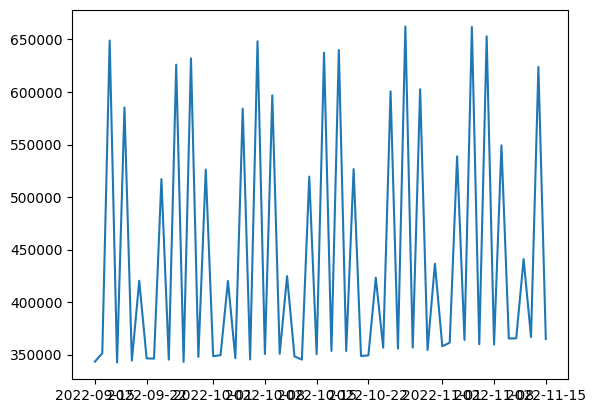

In [124]:
import matplotlib.pyplot as plt
plt.plot(results['date'],results['val'])

In [28]:
results.to_csv('ShannonIndex.csv',index=False)

In [29]:
#specify alternate index metric: HHI
#returns index value 0 if specification range exceeds data
start = date(2022,9,15)
end = date(2022,11,15)
results_HHI = index_calc(data,start,end,HHI)
results_HHI.to_csv('HHI_Index.csv',index=False)

100%|██████████| 62/62 [09:04<00:00,  8.78s/it]


In [31]:
results_HHI

val       date
0   0.000007 2022-09-15
1   0.000006 2022-09-16
2   0.000006 2022-09-17
3   0.000007 2022-09-18
4   0.000007 2022-09-19
..       ...        ...
57  0.000005 2022-11-11
58  0.000005 2022-11-12
59  0.000006 2022-11-13
60  0.000006 2022-11-14
61  0.000006 2022-11-15

[62 rows x 2 columns]

In [67]:
#specify alternate index metric: gini
#returns index value 0 if specification range exceeds data
start = date(2022,9,15)
end = date(2022,11,15)
results_Gini = index_calc(data,start,end,gini)
results_Gini.to_csv('Gini_Index.csv',index=False)

100%|██████████| 62/62 [09:38<00:00,  9.33s/it]


## Gini index plot

In [122]:
results_Gini

NameError: name 'results_Gini' is not defined

In [121]:
results_Gini

NameError: name 'results_Gini' is not defined

In [34]:
#specify alternate index metric: nakamoto coefficient
#returns index value 0 if specification range exceeds data
start = date(2022,9,15)
end = date(2022,11,15)
results_nakamoto = index_calc(data,start,end,nakamoto)
results_nakamoto.to_csv("results_nakamoto.csv")

100%|██████████| 62/62 [09:29<00:00,  9.18s/it]


In [35]:
results_nakamoto

val       date
0   167085.0 2022-09-15
1   168037.0 2022-09-16
2   169732.0 2022-09-17
3   170521.0 2022-09-18
4   171363.0 2022-09-19
..       ...        ...
57  185914.0 2022-11-11
58  186534.0 2022-11-12
59  186839.0 2022-11-13
60  186574.0 2022-11-14
61  186573.0 2022-11-15

[62 rows x 2 columns]

In [82]:
# Merge all the dataframes together
import pandas as pd

# Assuming the dataframes results, results_HHI, results_Gini, and results_nakamoto are already defined...

# Rename 'val' columns for each dataframe first
results = results.rename(columns={'val': 'ShannonEntropy'})
results_HHI = results_HHI.rename(columns={'val': 'HHI'})
results_Gini = results_Gini.rename(columns={'val': 'Gini'})  # There was a small inconsistency here, I assumed you want to rename this column 'Gini'
results_nakamoto = results_nakamoto.rename(columns={'val': 'Nakamoto'})

# Now, merge the dataframes on the 'Date' column
merged_df = results.merge(results_HHI, on='date', how='outer') \
    .merge(results_Gini, on='date', how='outer') \
    .merge(results_nakamoto, on='date', how='outer')

print(merged_df)
merged_df.columns

         date  ShannonEntropy       HHI      Gini  Nakamoto
0  2022-09-15   343158.473887  0.000007  0.183659  167085.0
1  2022-09-16   351243.574959  0.000006  0.181663  168037.0
2  2022-09-17   346643.537333  0.000006  0.174872  169732.0
3  2022-09-18   342390.371015  0.000007  0.172915  170521.0
4  2022-09-19   342117.349024  0.000007  0.170114  171363.0
..        ...             ...       ...       ...       ...
57 2022-11-11   365537.423381  0.000005  0.165161  185914.0
58 2022-11-12   366287.391020  0.000005  0.164779  186534.0
59 2022-11-13   366658.407297  0.000006  0.164446  186839.0
60 2022-11-14   365576.475299  0.000006  0.167613  186574.0
61 2022-11-15   364899.508537  0.000006  0.169065  186573.0

[62 rows x 5 columns]


Index(['date', 'ShannonEntropy', 'HHI', 'Gini', 'Nakamoto'], dtype='object')

In [83]:
# Reorder the columns
merged_df = merged_df[['date', 'ShannonEntropy', 'HHI', 'Gini', 'Nakamoto']]
Index4=merged_df
Index4.to_csv("Index4.csv")
Index4

date  ShannonEntropy       HHI      Gini  Nakamoto
0  2022-09-15   343158.473887  0.000007  0.183659  167085.0
1  2022-09-16   351243.574959  0.000006  0.181663  168037.0
2  2022-09-17   346643.537333  0.000006  0.174872  169732.0
3  2022-09-18   342390.371015  0.000007  0.172915  170521.0
4  2022-09-19   342117.349024  0.000007  0.170114  171363.0
..        ...             ...       ...       ...       ...
57 2022-11-11   365537.423381  0.000005  0.165161  185914.0
58 2022-11-12   366287.391020  0.000005  0.164779  186534.0
59 2022-11-13   366658.407297  0.000006  0.164446  186839.0
60 2022-11-14   365576.475299  0.000006  0.167613  186574.0
61 2022-11-15   364899.508537  0.000006  0.169065  186573.0

[62 rows x 5 columns]

In [86]:
Index4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            62 non-null     datetime64[ns]
 1   ShannonEntropy  62 non-null     float64       
 2   HHI             62 non-null     float64       
 3   Gini            62 non-null     float64       
 4   Nakamoto        62 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.9 KB


In [85]:
Index4.describe()

ShannonEntropy           HHI       Gini       Nakamoto
count       62.000000  6.200000e+01  62.000000      62.000000
mean    352526.658139  5.847996e-06   0.167343  178431.403226
std       7163.484436  3.497066e-07   0.003883    5014.455178
min     342117.349024  5.339966e-06   0.163645  167085.000000
25%     346547.885934  5.545094e-06   0.164971  175153.750000
50%     351023.609079  5.795176e-06   0.165841  178049.500000
75%     357040.544554  6.136007e-06   0.168266  182549.250000
max     366658.407297  6.671025e-06   0.183659  186839.000000

In [182]:
data= pd.read_csv('Index4.csv')

In [184]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Sample dataframe (replace with your actual dataframe)
df = data.copy()

# Create a 2x2 subplot layout
fig = make_subplots(rows=2, cols=2, subplot_titles=('ShannonEntropy', 'HHI', 'Gini', 'Nakamoto'))
# Add box plots to each subplot
fig.add_trace(go.Box(y=df['ShannonEntropy'], name='ShannonEntropy'), row=1, col=1)
fig.add_trace(go.Box(y=df['HHI'], name='HHI'), row=1, col=2)
fig.add_trace(go.Box(y=df['Gini'], name='Gini'), row=2, col=1)
fig.add_trace(go.Box(y=df['Nakamoto'], name='Nakamoto'), row=2, col=2)

# Explanation with LaTeX
#explanation = r'Note: In this plot, the symbol $\mu$ represents a factor of $10^{-6}$.'

# Update layout for better aesthetics and add explanation
fig.update_layout(
    title='Boxplots of Metrics: Total Validator Rewards',
    showlegend=True,
    font=dict(family="Courier New, monospace")
)

fig.show()


In [185]:
# Save the figure with high resolution
fig.write_image("index_boxplot.png", height=900, width=1600, scale=2)  # The scale parameter can be adjusted for desired resolution.

In [186]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Sample dataframe (replace with your actual dataframe)
df = data.copy()

# Create a 4x1 subplot layout
fig = make_subplots(rows=4, cols=1, shared_xaxes=False, subplot_titles=('ShannonEntropy', 'HHI', 'Gini', 'Nakamoto'))

# Add traces for each metric
fig.add_trace(go.Scatter(x=df['date'], y=df['ShannonEntropy'], mode='lines', name='ShannonEntropy'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['HHI'], mode='lines', name='HHI'), row=2, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['Gini'], mode='lines', name='Gini'), row=3, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['Nakamoto'], mode='lines', name='Nakamoto'), row=4, col=1)

# LaTeX styled title and subplot titles
fig.update_layout(
    title_text="Time Series of Metrics: Validator Total Rewards",
    font=dict(family="Courier New, monospace", size=16, color="#7f7f7f"),
    height=1000,  # Adjusted height
    template="plotly"  # Set the theme to ggplot2
)

# Add LaTeX explanation
# Explanation with LaTeX-style formatting
#explanation = "Note: In this plot, the symbol $\\mu$ represents the metric prefix 'micro-', denoting a factor of $10^{-6}$."

# Show the plot
fig.show()


In [187]:
# Save the figure with high resolution
fig.write_image("index_timeseries.png", height=900, width=1600, scale=2)  # The scale parameter can be adjusted for desired resolution.

In [170]:
import pandas as pd
from scipy.stats import shapiro, anderson

# Sample dataframe (replace with your actual dataframe)
df = data.copy()

# Shapiro-Wilk Test
def shapiro_test(data):
    stat, p = shapiro(data)
    print(f'Shapiro-Wilk Test:\nStatistic={stat:.5f}, p={p:.5f}')
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('Sample does not look Gaussian (reject H0)\n')

# Anderson-Darling Test
def anderson_test(data):
    result = anderson(data)
    print('Anderson-Darling Test:')
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print(f'At significance level {sl:.2f}, data looks normal (fail to reject H0)')
        else:
            print(f'At significance level {sl:.2f}, data does not look normal (reject H0)')
    print()

columns = ['ShannonEntropy', 'HHI', 'Gini', 'Nakamoto']

for col in columns:
    print(f"Testing for variable: {col}")
    shapiro_test(df[col])
    anderson_test(df[col])


Testing for variable: ShannonEntropy
Shapiro-Wilk Test:
Statistic=0.93672, p=0.00322
Sample does not look Gaussian (reject H0)

Anderson-Darling Test:
At significance level 15.00, data does not look normal (reject H0)
At significance level 10.00, data does not look normal (reject H0)
At significance level 5.00, data does not look normal (reject H0)
At significance level 2.50, data does not look normal (reject H0)
At significance level 1.00, data does not look normal (reject H0)

Testing for variable: HHI
Shapiro-Wilk Test:
Statistic=0.94500, p=0.00772
Sample does not look Gaussian (reject H0)

Anderson-Darling Test:
At significance level 15.00, data does not look normal (reject H0)
At significance level 10.00, data does not look normal (reject H0)
At significance level 5.00, data does not look normal (reject H0)
At significance level 2.50, data does not look normal (reject H0)
At significance level 1.00, data does not look normal (reject H0)

Testing for variable: Gini
Shapiro-Wilk Tes

In [171]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def test_stationarity(df, columns):
    for column in columns:
        print(f"\nTesting stationarity for column: {column}")
        
        # Perform ADF test
        result = adfuller(df[column])
        
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        print('Critical Values:', result[4])
        
        # Interpretation based on p-value
        if result[1] <= 0.05:
            print(f"The series {column} is likely stationary.")
        else:
            print(f"The series {column} is likely non-stationary.")

# Given your dataframe name is 'df'
columns_to_test = ["ShannonEntropy", "HHI", "Gini", "Nakamoto"]
test_stationarity(df, columns_to_test)



Testing stationarity for column: ShannonEntropy
ADF Statistic: 3.524384912045216
p-value: 1.0
Critical Values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
The series ShannonEntropy is likely non-stationary.

Testing stationarity for column: HHI
ADF Statistic: -0.7676504925570588
p-value: 0.8284403285307048
Critical Values: {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}
The series HHI is likely non-stationary.

Testing stationarity for column: Gini
ADF Statistic: -5.337737232600176
p-value: 4.571496308611603e-06
Critical Values: {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}
The series Gini is likely stationary.

Testing stationarity for column: Nakamoto
ADF Statistic: -1.027409896302492
p-value: 0.7431363761633927
Critical Values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
The series Nakamoto is likely non-stationary.


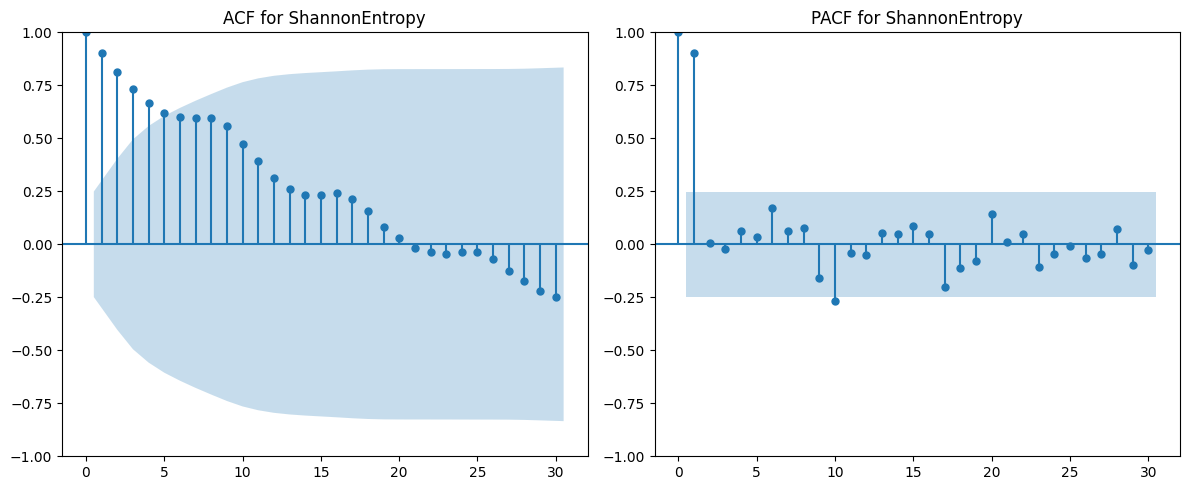

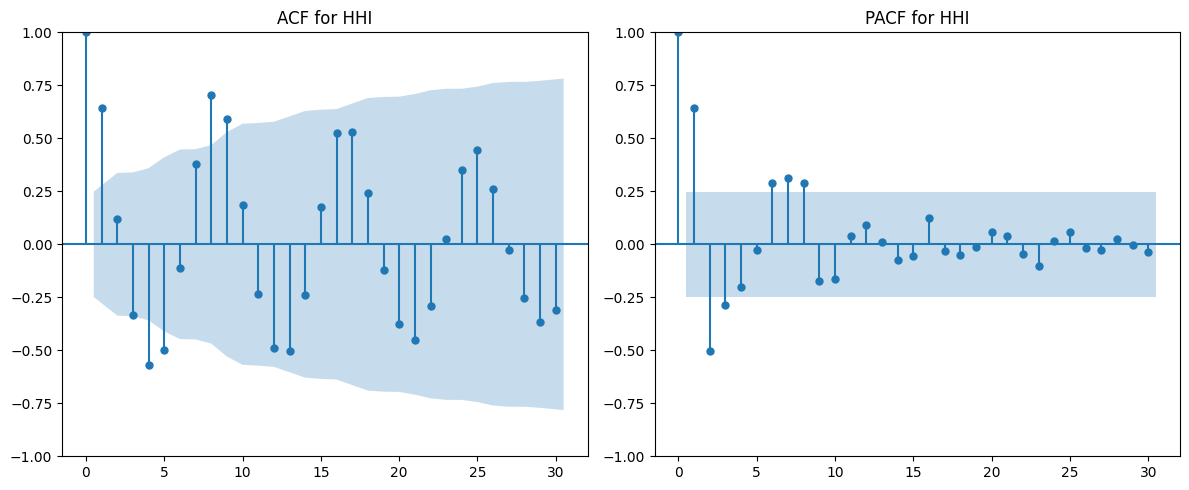

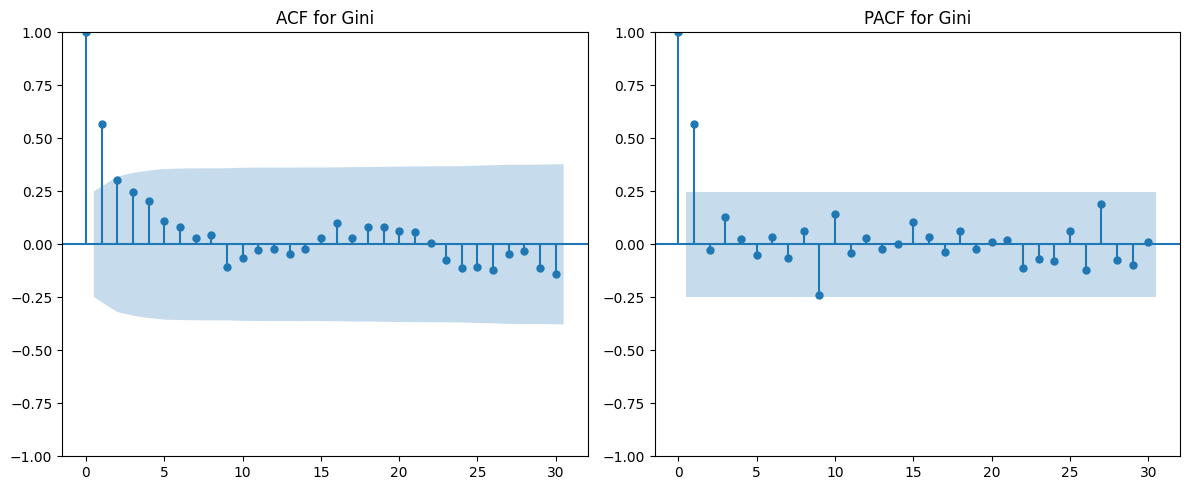

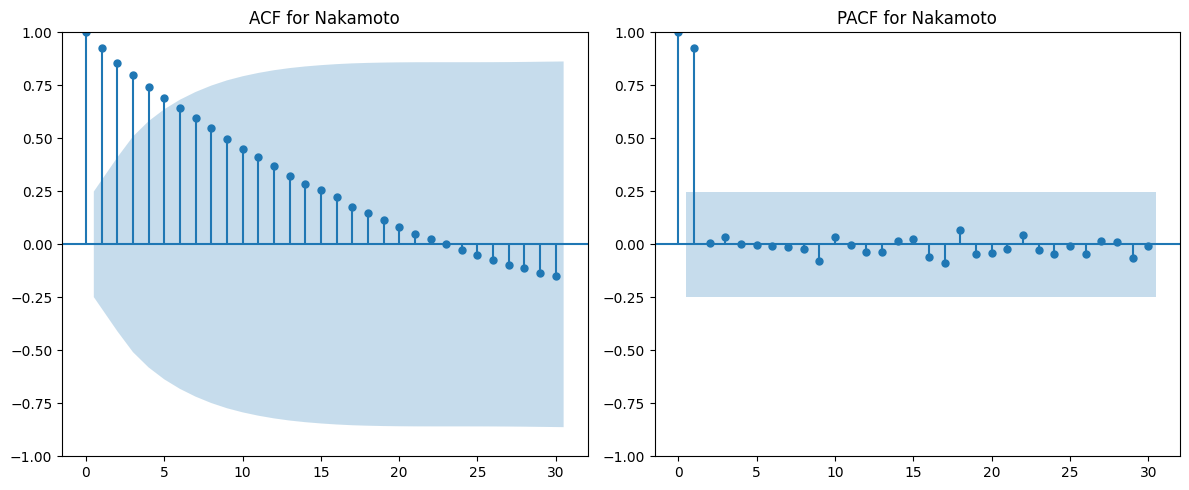

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df=data.copy()
def plot_autocorrelation(df, column_name):
    plt.figure(figsize=(12, 5))
    
    max_lags = len(df) // 2 - 1  # Ensure lags are less than half the sample size
    
    # ACF plot
    plt.subplot(1, 2, 1)
    plot_acf(df[column_name], lags=max_lags, ax=plt.gca())
    plt.title(f'ACF for {column_name}')
    
    # PACF plot
    plt.subplot(1, 2, 2)
    plot_pacf(df[column_name], lags=max_lags, ax=plt.gca())
    plt.title(f'PACF for {column_name}')
    
    plt.tight_layout()

# Save the figure with high resolution
    filename = f"{column_name}_autocorrelation.png"
    plt.savefig(filename, dpi=1800)  # You can adjust the DPI value for desired resolution.
    plt.show()

# For each of your columns
columns_to_test = ["ShannonEntropy", "HHI", "Gini", "Nakamoto"]
for column in columns_to_test:
    plot_autocorrelation(df, column)


> ACF Plot: The autocorrelation function plot gives you the correlation of the series with itself, lagged by x time units. So the y-axis is the correlation and the x-axis is the number of time units of lag.

> PACF Plot: The partial autocorrelation function plot gives the correlation of the series with itself, lagged by x time units, but with the relationships at shorter lags removed.

**Interpreting these plots**:

> Sudden Drop-Off: If either the ACF or PACF shows a sudden drop-off after a certain number of lags, this might indicate that this is the order of the autoregressive term.

> Gradual Decline: If the ACF shows a gradual decline and PACF shows a sudden drop-off, this might indicate that this is the order of the moving average term.

> Significant Spikes: If there are significant spikes at specific lags, this can indicate seasonality in the data.

By analyzing the ACF and PACF plots, you can get insights about potential patterns in your data and inform your choices when building time series models.

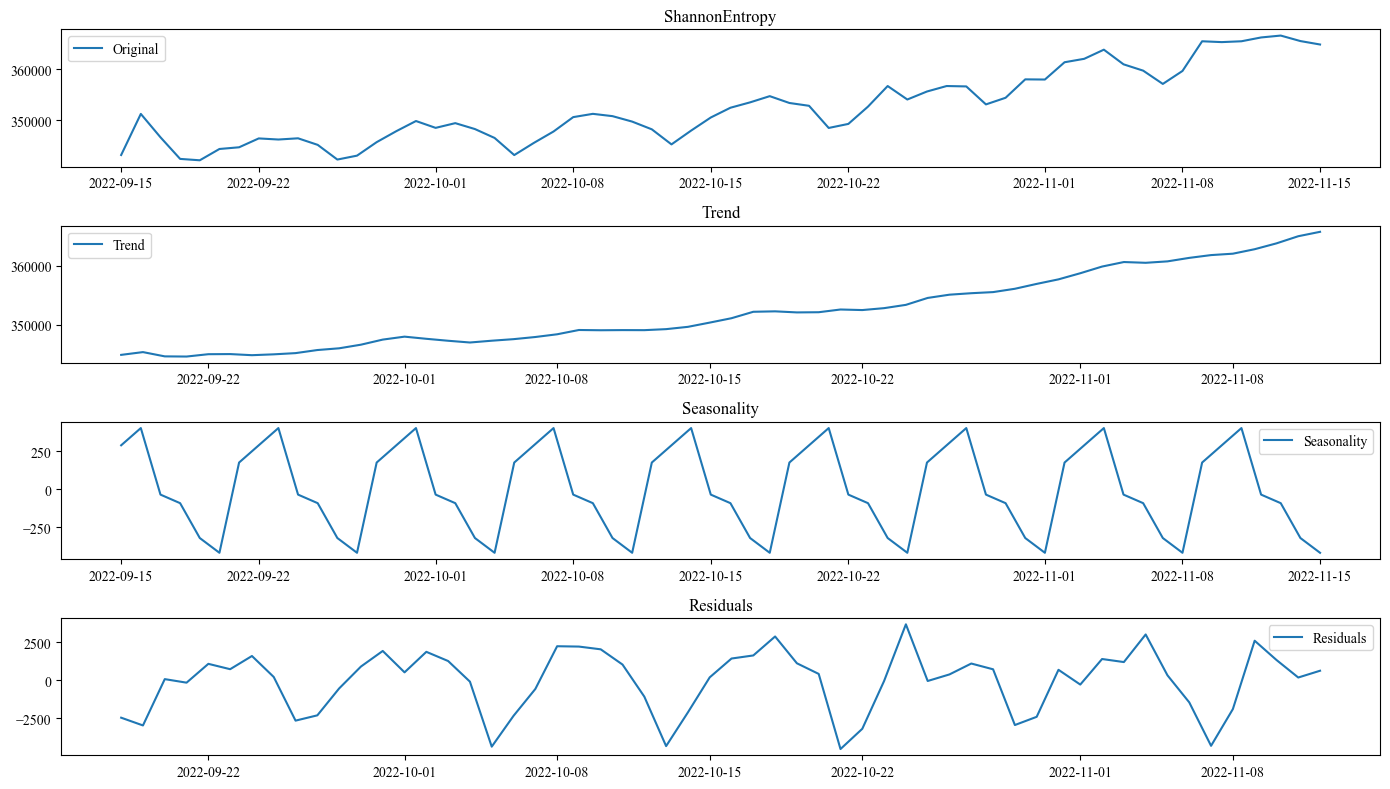

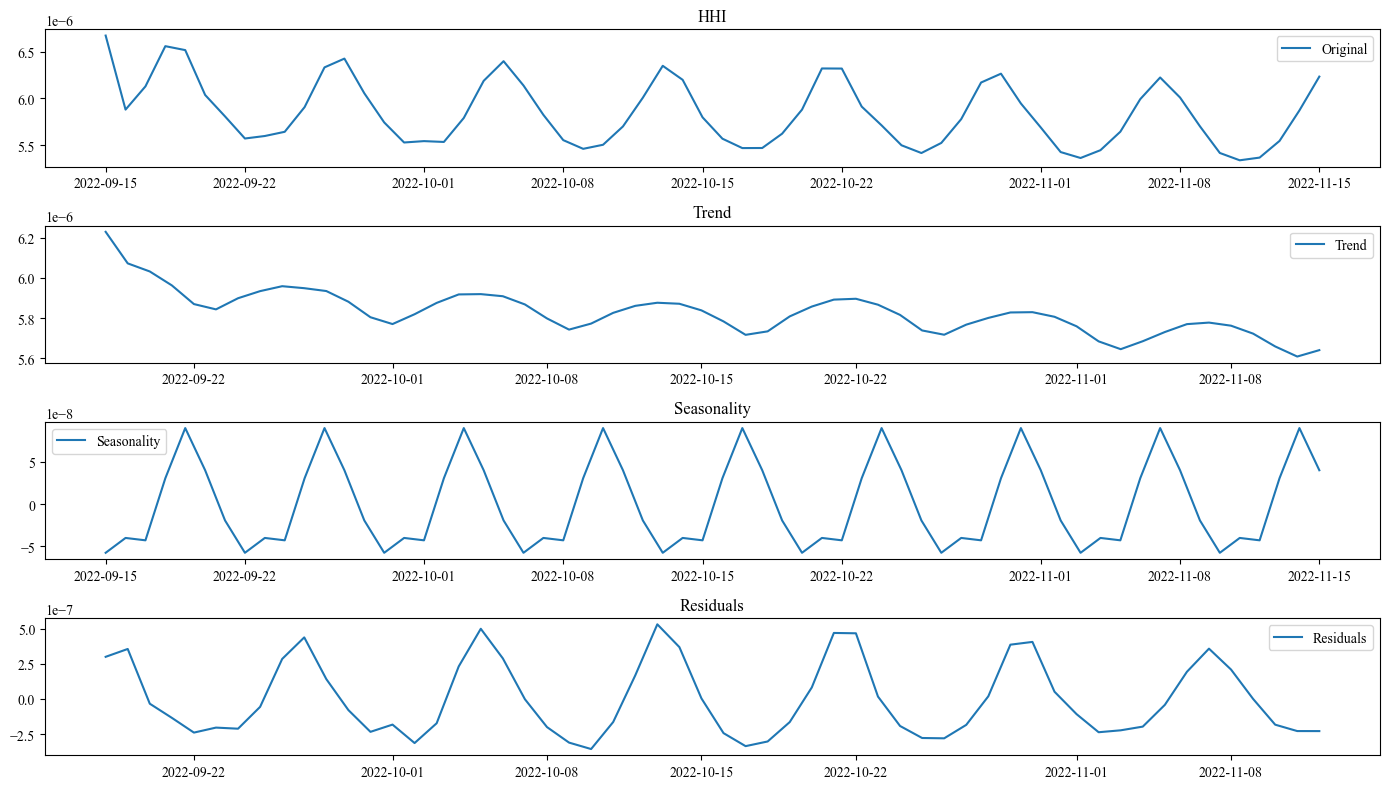

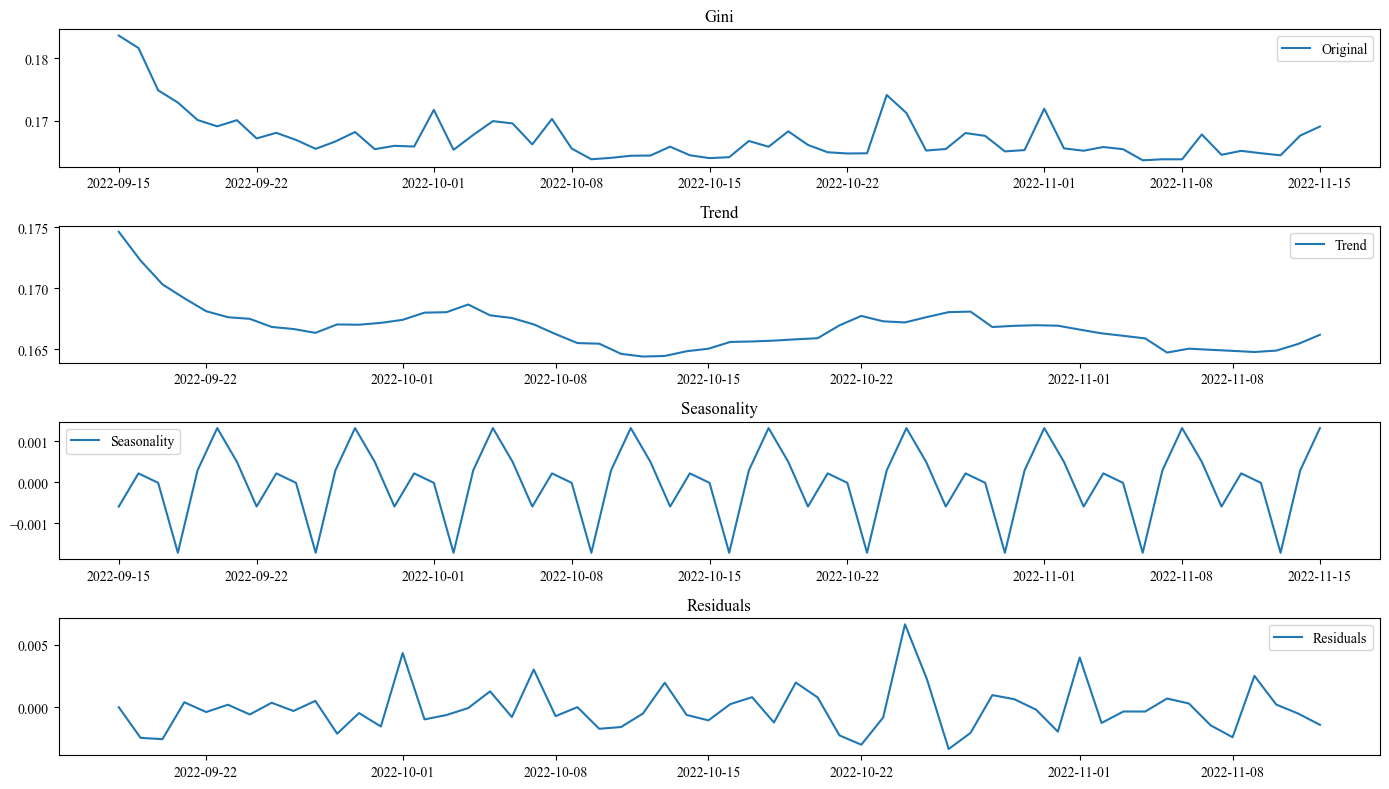

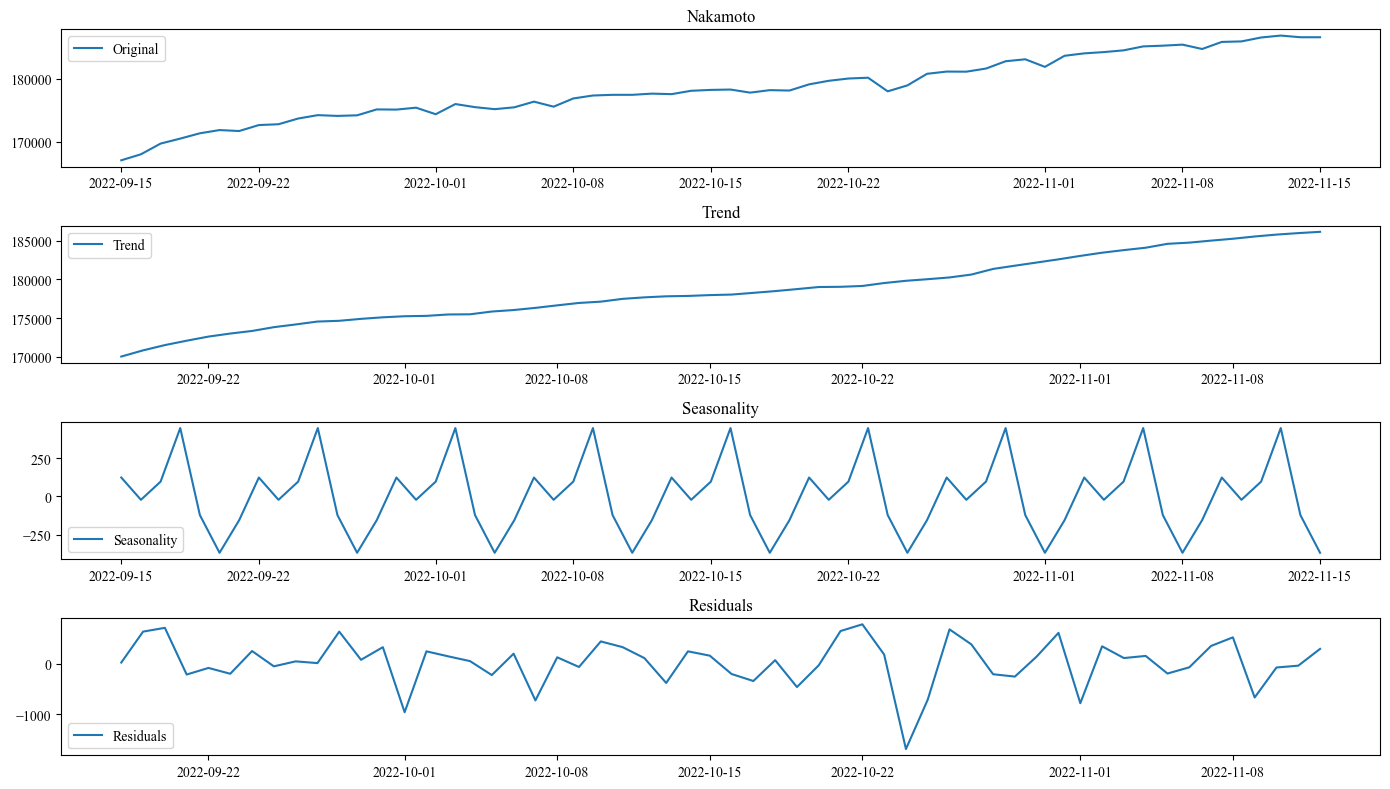

In [173]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Assuming 'data' is your DataFrame
df = data.copy()
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Ensure consistent frequency
if pd.infer_freq(df.index) is not None:
    df = df.asfreq(pd.infer_freq(df.index))
else:
    raise ValueError("Data frequency can't be inferred. Ensure your data has consistent frequency or manually set it.")

# Adjust matplotlib settings
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Define a function to decompose and plot
def plot_decomposition(df, column_name, period=None):
    decomposition = seasonal_decompose(df[column_name], period=period, model='additive')
    
    plt.figure(figsize=(14, 8))
    
    # Original
    plt.subplot(4, 1, 1)
    plt.plot(df[column_name], label='Original')
    plt.legend(loc='best')
    plt.title(column_name)
    
    # Trend
    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='best')
    plt.title("Trend")

    # Seasonal
    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.title("Seasonality")

    # Residuals
    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Residuals')
    plt.legend(loc='best')
    plt.title("Residuals")
    
    plt.tight_layout()
    
    # Save the figure to PNG
    plt.savefig(f'{column_name}_decomposition.png', dpi=900)
    plt.show()

# Decompose
# Provided code to set date as index, infer frequency, and plot
columns_to_decompose = ["ShannonEntropy", "HHI", "Gini", "Nakamoto"]
for column in columns_to_decompose:
    plot_decomposition(df, column)


In [175]:
import numpy as np

def detect_seasonality_frequency(ts):
    # Compute the FFT and power spectrum
    fft_vals = np.fft.fft(ts.fillna(0))
    fft_freq = np.fft.fftfreq(len(ts))
    
    # Remove the negative frequencies
    fft_vals = fft_vals[fft_freq > 0]
    fft_freq = fft_freq[fft_freq > 0]
    
    # Find the frequency with the maximum power (excluding the zero frequency)
    dominant_frequency = fft_freq[np.argmax(np.abs(fft_vals)[1:]) + 1]
    
    # Convert frequency to period (seasonality)
    seasonality = int(np.round(1 / dominant_frequency))
    return seasonality

for column in columns_to_decompose:
    seasonality = detect_seasonality_frequency(df[column].dropna())
    print(f"Detected seasonality for {column}: {seasonality} time units")


Detected seasonality for ShannonEntropy: 31 time units
Detected seasonality for HHI: 9 time units
Detected seasonality for Gini: 21 time units
Detected seasonality for Nakamoto: 31 time units


In [177]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import numpy as np

def estimate_growth_rate(df, column_name):
    # Decompose the time series
    decomposition = seasonal_decompose(df[column_name], model='additive')
    
    # Extract trend component
    trend = decomposition.trend.dropna()
    
    # Create a time variable, t
    t = np.arange(len(trend)).reshape(-1, 1)
    
    # Fit linear regression model
    model = LinearRegression().fit(t, trend)
    
    # Return the slope as the growth rate
    return model.coef_[0]

for column in columns_to_decompose:
    growth_rate = estimate_growth_rate(df, column)
    print(f"Estimated growth rate for {column}: {growth_rate:.4f} per time unit")


Estimated growth rate for ShannonEntropy: 367.8186 per time unit
Estimated growth rate for HHI: -0.0000 per time unit
Estimated growth rate for Gini: -0.0001 per time unit
Estimated growth rate for Nakamoto: 261.7281 per time unit


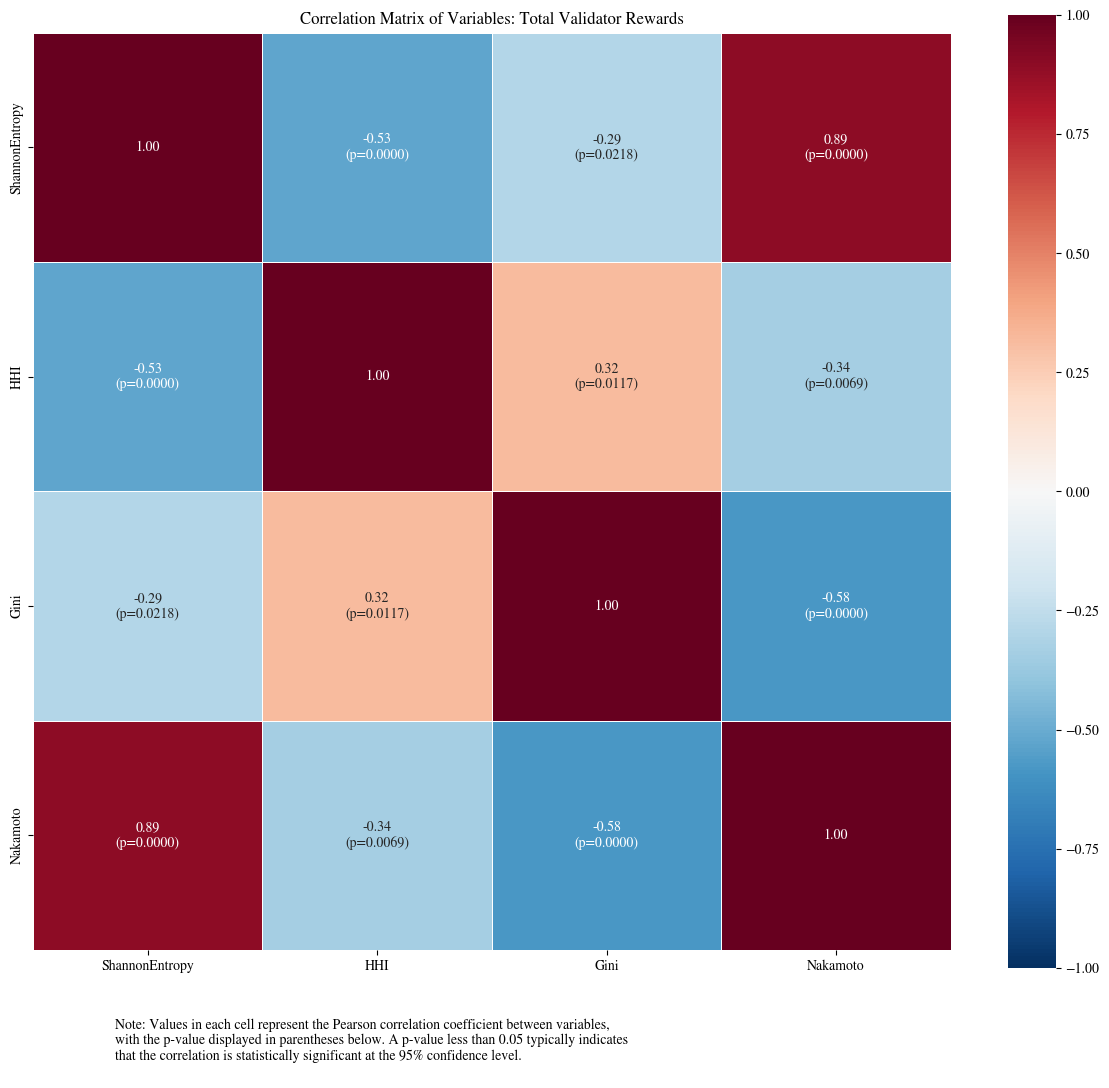

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

df = data.copy()
# Ensure LaTeX is disabled
plt.rcParams['text.usetex'] = False

# Use the 'STIX' fonts for a LaTeX-like appearance without requiring LaTeX
plt.rcParams['font.family'] = 'STIXGeneral'

# Compute the correlation matrix
corr_matrix = df[columns_to_decompose].corr()

# Compute the matrix of p-values
p_matrix = df[columns_to_decompose].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*corr_matrix.shape)

# Create an array to hold the annotations
annotations = corr_matrix.copy()
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        if i != j:
            annotations.iloc[i, j] = f'{corr_matrix.iloc[i, j]:.2f}\n(p={p_matrix.iloc[i, j]:.4f})'
        else:
            annotations.iloc[i, j] = f'{corr_matrix.iloc[i, j]:.2f}'

# Plot the heatmap with the "RdBu_r" colormap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=annotations, cmap="RdBu_r", vmin=-1, vmax=1, square=True, linewidths=.5, fmt='')
plt.title('Correlation Matrix of Variables: Total Validator Rewards')

# Add a figure note
figure_note = """
Note: Values in each cell represent the Pearson correlation coefficient between variables, 
with the p-value displayed in parentheses below. A p-value less than 0.05 typically indicates 
that the correlation is statistically significant at the 95% confidence level.
"""
plt.figtext(0.1, -0.01, figure_note, ha="left", va="top", fontsize=10, wrap=True)

plt.tight_layout()
filename = "index_Correlations.png"
plt.savefig(filename, dpi=900)  # saves with 900 DPI.
plt.show()


In [191]:
# Save the figure with high resolution
fig.write_image("index_correlations.png", height=900, width=1600, scale=2)  # The scale parameter can be adjusted for desired resolution.

# References:
Code adapted from SoK: Blockchain Decentralization: https://arxiv.org/abs/2205.04256